# Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [13]:
# loading the data from csv file to panda dataframe
car_dataset = pd.read_csv('car data.csv')

In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [18]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the Categorical Data

In [23]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace = True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace = True)

# encoding "Transmission" column
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)

/tmp/ipython-input-23-2524159666.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace = True)
/tmp/ipython-input-23-2524159666.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace = True)
/tmp/ipython-input-23-2524159666.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [24]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the Data and Target

In [25]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis= 1)
Y = car_dataset['Selling_Price']

In [26]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [27]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


# Splitting the data into Training data and Test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


# Model Trainig



## Linear Regression

In [34]:
# loading the linear regression model
lin_reg_model = LinearRegression()


In [35]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

# Model Evalution

### Prediction on Training data

In [46]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [47]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error : ', error_score)


# Mean Absolute Error
MAE = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean Absolute Error : ', MAE)

R Squared Error :  0.8838169193709796
Mean Absolute Error :  1.1998520242148687


### Visualize the Actual prices and the Predicted prices

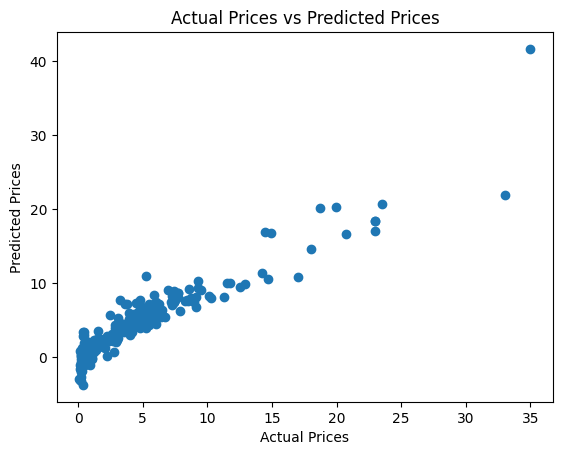

In [48]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

/tmp/ipython-input-62-3892360242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_train - training_data_prediction),hist = False)


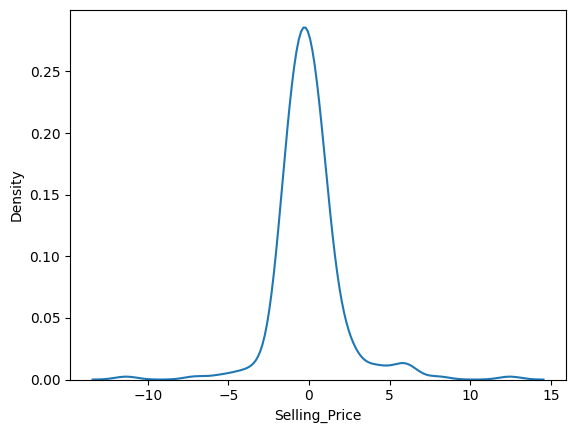

In [62]:
sns.distplot((Y_train - training_data_prediction),hist = False)
plt.show()

### Prediction on Test data

In [49]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [50]:
# R Squared Error
error_score1 = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error : ', error_score)


# Mean Absolute Error
MAE1 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error : ', MAE)

R Squared Error :  0.8838169193709796
Mean Absolute Error :  1.1998520242148687


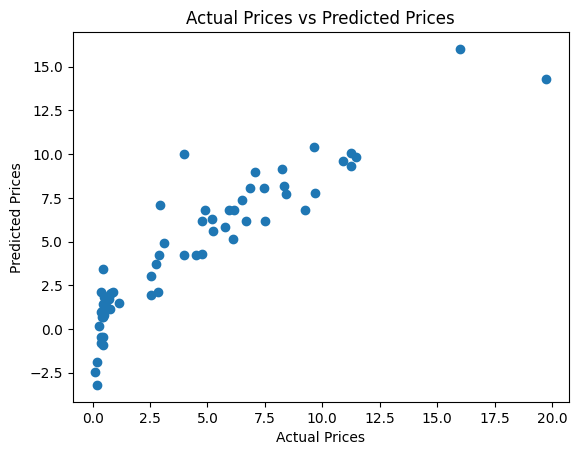

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Lasso Regression

In [52]:
# loading the linear regression model
lass_reg_model = Lasso()


In [53]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

# Model Evalution

### Prediction on Training data

In [55]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [56]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error : ', error_score)


# Mean Absolute Error
MAE = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean Absolute Error : ', MAE)

R Squared Error :  0.843587395258283
Mean Absolute Error :  1.2810306200223531


### Visualize the Actual prices and the Predicted prices

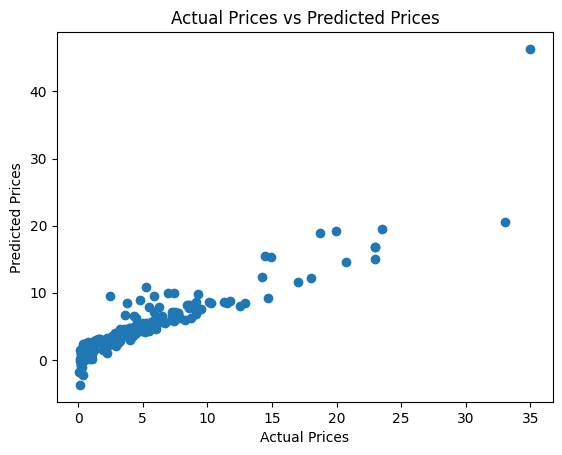

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Prediction on Test data

In [58]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [59]:
# R Squared Error
error_score1 = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error : ', error_score)


# Mean Absolute Error
MAE1 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error : ', MAE)

R Squared Error :  0.843587395258283
Mean Absolute Error :  1.2810306200223531


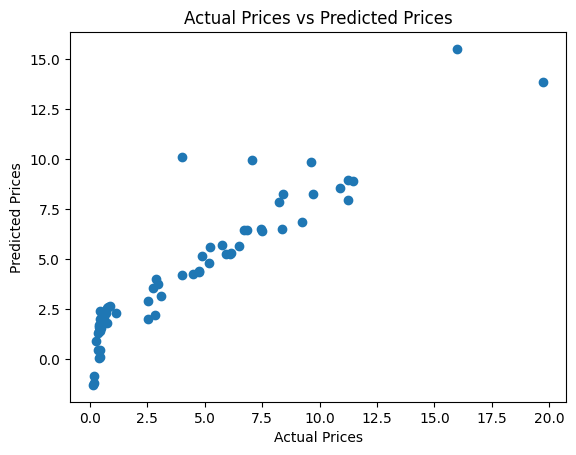

In [60]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()